In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Intelipaat/Lecture/AI/27th nov RNN/airline-passengers.csv")

In [4]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.shape

(144, 2)

In [6]:
data = data["Passengers"]

In [7]:
data = data.values

### Prepare train data

In [8]:
def create_data(data, timeperiod):
    X = []
    Y = []
    for i in range(len(data)-timeperiod-1):
        X.append(data[i:(i+timeperiod)][0])
        Y.append(data[(i+timeperiod)])
    return X, Y

In [9]:
X, Y = create_data(data, 1)

In [10]:
pd.DataFrame({"X":X, "Y":Y}).head()

,X,Y
0,112,118
1,118,132
2,132,129
3,129,121
4,121,135


#### Train Test Split

In [11]:
train_size = 0.7
cut = round(train_size*len(X))
trainX = np.array(X[:cut]).astype(float).reshape(-1,1,1)
testX = np.array(X[cut:]).astype(float).reshape(-1,1,1)
trainY = np.array(Y[:cut]).astype(float)
testY = np.array(Y[cut:]).astype(float)

In [12]:
cut

99

In [13]:
len(testY)

43

#### Model Building

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam, Adadelta

In [15]:
model1 =  Sequential()
model1.add(SimpleRNN(5, input_shape = (1, 1), activation="relu"))
model1.add(Dense(1))

In [16]:
model2 =  Sequential()
model2.add(SimpleRNN(5, input_shape = (1, 1), activation="relu"))
model2.add(Dense(1))

In [17]:
model1.compile(optimizer = Adam(learning_rate=0.1), loss= "mean_squared_error")

In [18]:
model2.compile(optimizer = Adam(), loss= "mean_squared_error")

In [19]:
model1.fit(x=trainX, y=trainY, epochs=2, batch_size=1)

Epoch 1/2
99/99 [==============================] - 1s 2ms/step - loss: 4521.5620
Epoch 2/2
99/99 [==============================] - 0s 2ms/step - loss: 747.3863


In [20]:
model2.fit(x=trainX, y=trainY, epochs=2, batch_size=1)

Epoch 1/2
99/99 [==============================] - 1s 2ms/step - loss: 112768.1328
Epoch 2/2
99/99 [==============================] - 0s 2ms/step - loss: 93474.3750


In [21]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [22]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [23]:
testX

array([[[348.]],

       [[355.]],

       [[422.]],

       [[465.]],

       [[467.]],

       [[404.]],

       [[347.]],

       [[305.]],

       [[336.]],

       [[340.]],

       [[318.]],

       [[362.]],

       [[348.]],

       [[363.]],

       [[435.]],

       [[491.]],

       [[505.]],

       [[404.]],

       [[359.]],

       [[310.]],

       [[337.]],

       [[360.]],

       [[342.]],

       [[406.]],

       [[396.]],

       [[420.]],

       [[472.]],

       [[548.]],

       [[559.]],

       [[463.]],

       [[407.]],

       [[362.]],

       [[405.]],

       [[417.]],

       [[391.]],

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]]])

In [24]:
data.reshape(-1,1,1)

array([[[112]],

       [[118]],

       [[132]],

       [[129]],

       [[121]],

       [[135]],

       [[148]],

       [[148]],

       [[136]],

       [[119]],

       [[104]],

       [[118]],

       [[115]],

       [[126]],

       [[141]],

       [[135]],

       [[125]],

       [[149]],

       [[170]],

       [[170]],

       [[158]],

       [[133]],

       [[114]],

       [[140]],

       [[145]],

       [[150]],

       [[178]],

       [[163]],

       [[172]],

       [[178]],

       [[199]],

       [[199]],

       [[184]],

       [[162]],

       [[146]],

       [[166]],

       [[171]],

       [[180]],

       [[193]],

       [[181]],

       [[183]],

       [[218]],

       [[230]],

       [[242]],

       [[209]],

       [[191]],

       [[172]],

       [[194]],

       [[196]],

       [[196]],

       [[236]],

       [[235]],

       [[229]],

       [[243]],

       [[264]],

       [[272]],

       [[237]],

       [[211]],

       [[180]]

In [25]:
testX.shape

(43, 1, 1)

In [26]:
preds1 = model1.predict(data.reshape(-1,1,1).astype("float")).flatten()

5/5 [==============================] - 0s 3ms/step


In [27]:
preds2 = model2.predict(data.reshape(-1,1,1).astype("float")).flatten()

5/5 [==============================] - 0s 3ms/step


In [28]:
import matplotlib.pyplot as plt

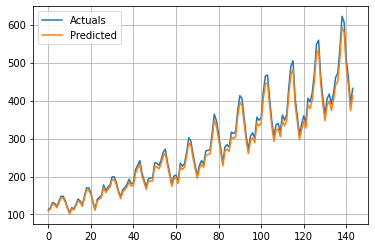

In [29]:
plt.plot(data)
plt.plot(preds1)
plt.legend(["Actuals", "Predicted"])
plt.grid()
plt.show()

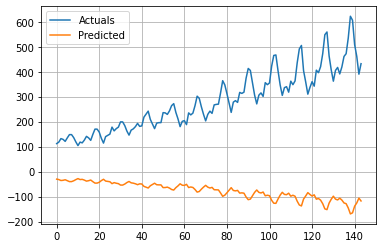

In [30]:
plt.plot(data)
plt.plot(preds2)
plt.legend(["Actuals", "Predicted"])
plt.grid()
plt.show()

In [31]:
preds1

array([109.100426, 114.79668 , 128.08794 , 125.23981 , 117.644806,
       130.93607 , 143.27794 , 143.27794 , 131.88544 , 115.74605 ,
       101.505424, 114.79668 , 111.948555, 122.39168 , 136.63231 ,
       130.93607 , 121.4423  , 144.22733 , 164.1642  , 164.1642  ,
       152.7717  , 129.03731 , 110.99917 , 135.68294 , 140.42982 ,
       145.1767  , 171.7592  , 157.51857 , 166.06294 , 171.7592  ,
       191.69608 , 191.69608 , 177.45544 , 156.5692  , 141.3792  ,
       160.3667  , 165.11357 , 173.65794 , 185.99983 , 174.60733 ,
       176.50607 , 209.7342  , 221.12671 , 232.51921 , 201.18982 ,
       184.10107 , 166.06294 , 186.94919 , 188.84796 , 188.84796 ,
       226.82295 , 225.87358 , 220.17732 , 233.46857 , 253.40546 ,
       261.00046 , 227.77232 , 203.08856 , 173.65794 , 193.59483 ,
       196.44293 , 181.25294 , 225.87358 , 218.27858 , 224.92421 ,
       253.40546 , 289.4817  , 280.93732 , 248.65858 , 220.17732 ,
       195.49358 , 220.17732 , 232.51921 , 223.97482 , 256.253

In [32]:
preds2

array([ -30.311844,  -31.949865,  -35.771915,  -34.9529  ,  -32.768875,
        -36.590927,  -40.139973,  -40.139973,  -36.86393 ,  -32.222862,
        -28.127815,  -31.949865,  -31.130854,  -34.13389 ,  -38.228947,
        -36.590927,  -33.860886,  -40.412975,  -46.14605 ,  -46.14605 ,
        -42.870007,  -36.044918,  -30.857851,  -37.955944,  -39.320957,
        -40.685974,  -48.330082,  -44.235023,  -46.692062,  -48.330082,
        -54.063156,  -54.063156,  -49.9681  ,  -43.96202 ,  -39.593964,
        -45.054035,  -46.419052,  -48.876087,  -52.425133,  -49.14909 ,
        -49.6951  ,  -59.250225,  -62.526264,  -65.80231 ,  -56.793194,
        -51.879128,  -46.692062,  -52.698135,  -53.24415 ,  -53.24415 ,
        -64.16429 ,  -63.89128 ,  -62.253265,  -66.07532 ,  -71.80839 ,
        -73.992424,  -64.437294,  -57.339195,  -48.876087,  -54.609165,
        -55.428177,  -51.060116,  -63.89128 ,  -61.707256,  -63.618282,
        -71.80839 ,  -82.182526,  -79.725494,  -70.44337 ,  -62.